# Reading data

In [1]:
import pandas as pd
import numpy as np
import torch
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [3]:
PATH = os.path.join("../data", "train_scaled_2.0.csv")
data = pd.read_csv(PATH)
data = shuffle(data)

In [4]:
data = data.dropna()

In [5]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age,gender,test_indication
54775,0.0,0.0,1.0,0.0,0.0,0.0,74.0,0.0,0.0
86388,0.0,0.0,0.0,0.0,1.0,0.0,78.0,0.0,0.0
61128,1.0,1.0,0.0,0.0,0.0,0.0,84.0,1.0,0.0
6359,1.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
30896,1.0,1.0,1.0,1.0,0.0,0.0,19.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
57217,1.0,0.0,0.0,0.0,1.0,0.0,31.0,1.0,0.0
77885,2.0,4.0,0.0,0.0,0.0,1.0,24.0,1.0,1.0
36345,0.0,1.0,0.0,0.0,1.0,0.0,60.0,1.0,0.0
21562,0.0,1.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0


In [6]:
y = data["corona_result"]
# data["gender"] = data["gender"].map({"male": 1, "female": 0})
# data["age_60_and_above"] = data["age_60_and_above"].map({"Yes": 1, "No": 0})
# data["test_indication"] = data["test_indication"].map({"Contact with confirmed": 2, "Abroad": 1, "Other": 0})
# data = data.drop(["test_date"], axis = 1)
# data = data.fillna(-1)

In [7]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age,gender,test_indication
54775,0.0,0.0,1.0,0.0,0.0,0.0,74.0,0.0,0.0
86388,0.0,0.0,0.0,0.0,1.0,0.0,78.0,0.0,0.0
61128,1.0,1.0,0.0,0.0,0.0,0.0,84.0,1.0,0.0
6359,1.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
30896,1.0,1.0,1.0,1.0,0.0,0.0,19.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
57217,1.0,0.0,0.0,0.0,1.0,0.0,31.0,1.0,0.0
77885,2.0,4.0,0.0,0.0,0.0,1.0,24.0,1.0,1.0
36345,0.0,1.0,0.0,0.0,1.0,0.0,60.0,1.0,0.0
21562,0.0,1.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0


In [8]:
data["test_indication"].value_counts()

0.0    92517
1.0     9887
2.0     5138
Name: test_indication, dtype: int64

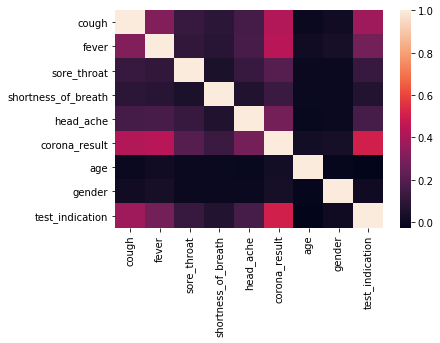

In [9]:
sns.heatmap(data.corr());

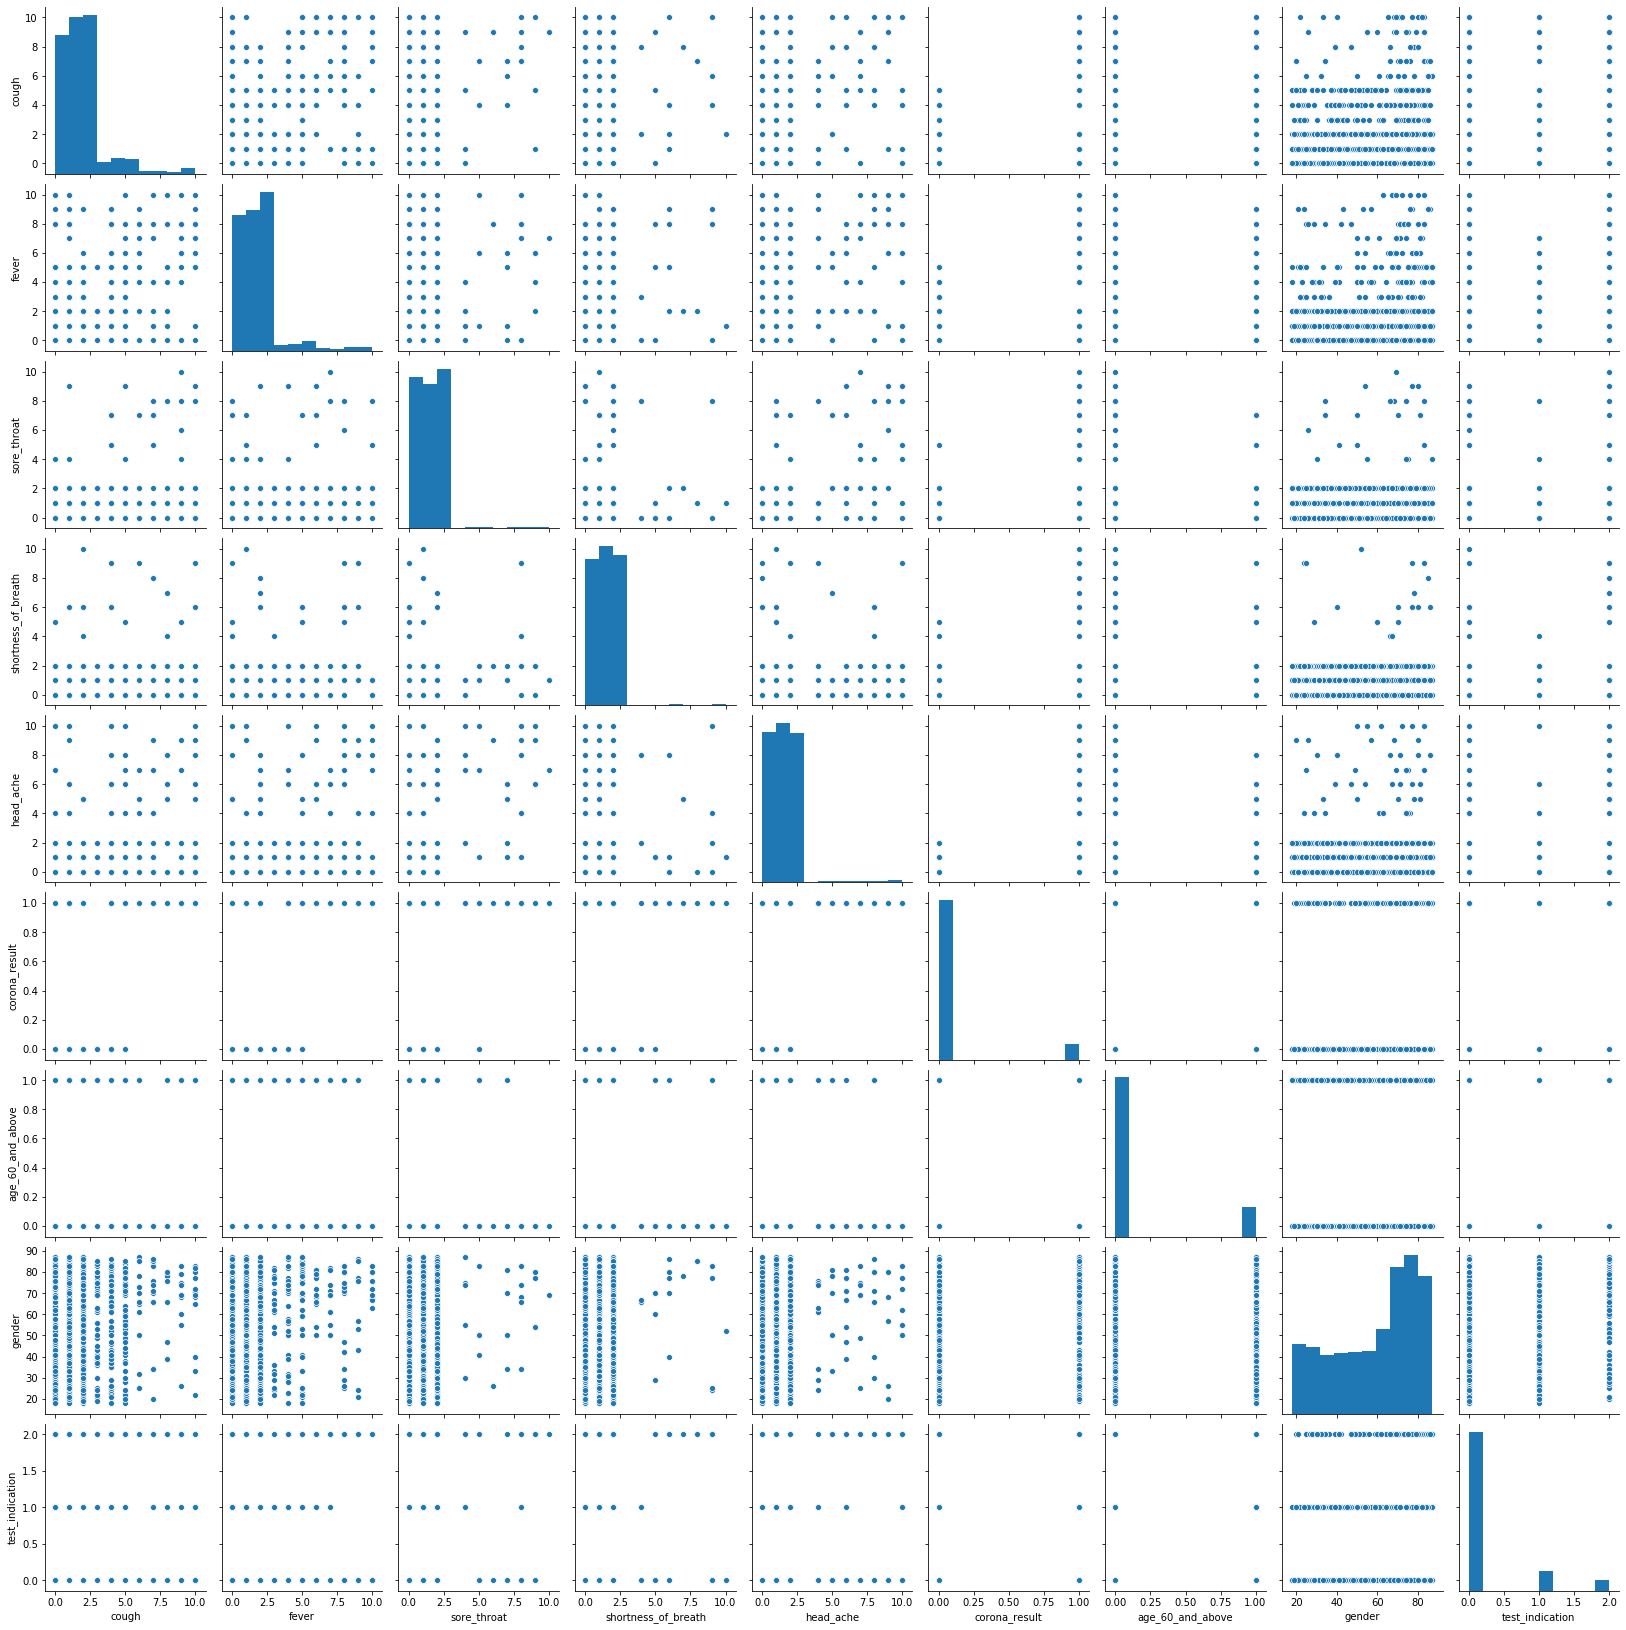

In [16]:
%config InlineBackend.figure_format = 'png'
# sns.pairplot(data[data.columns[1:]]);
sns.pairplot(data.iloc[:2000])

In [10]:
%%time
tsne = TSNE(n_components = 2, random_state = 11)
tsne_repr = tsne.fit_transform(StandardScaler().fit_transform(data.iloc[:7000, :]))

Wall time: 1min 15s


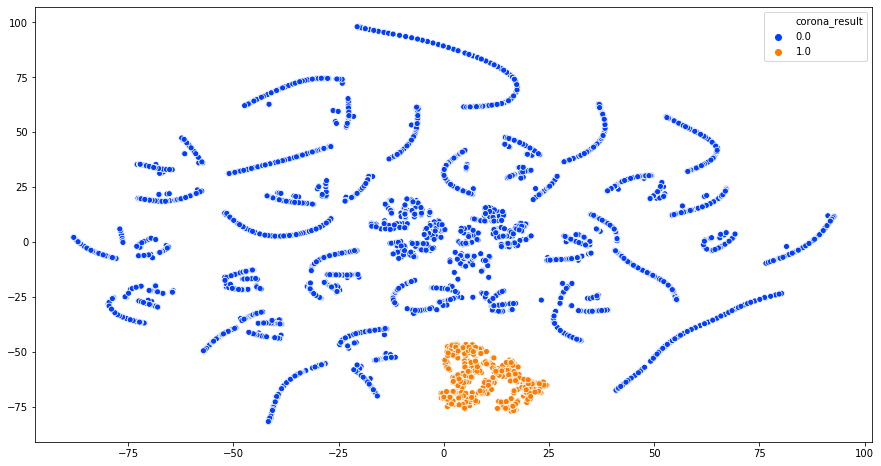

In [12]:
plt.figure(figsize = (15, 8))
sns.scatterplot(tsne_repr[:, 0], tsne_repr[:, 1], hue = data["corona_result"][:7000], \
                palette = sns.color_palette("bright")[:2]);